In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from colour import wavelength_to_XYZ

In [2]:
from chromalab.observer import Observer, Cone, getsRGBfromWavelength, transformToDisplayChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import *
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import Animation

objc[37967]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2bc7c2e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d877e6f0). One of the two will be used. Which one is undefined.
objc[37967]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2bc7c2db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d877e718). One of the two will be used. Which one is undefined.
objc[37967]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2bc7c2e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

### Create the Cone Fundamentals for trichromat, tetrachromat, and made up equally spaced tetrachromat

In [4]:
wavelengths = np.arange(400, 700, 5)
d65 = Illuminant.get("D65")
leds = [660, 550, 451, 590, 510, 410]

In [5]:
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)

cones = [Cone.cone(x, wavelengths=wavelengths, template="neitz", od=0.35) for x in [450, 500, 550, 600]]
equally_spaced_tetrachromat = Observer(cones, illuminant=d65, verbose=True)
maxbasis_eq = MaxBasis(equally_spaced_tetrachromat, verbose=True)

trichromat = Observer.trichromat(wavelengths=wavelengths) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)

100%|██████████| 57/57 [00:00<00:00, 572.71it/s]


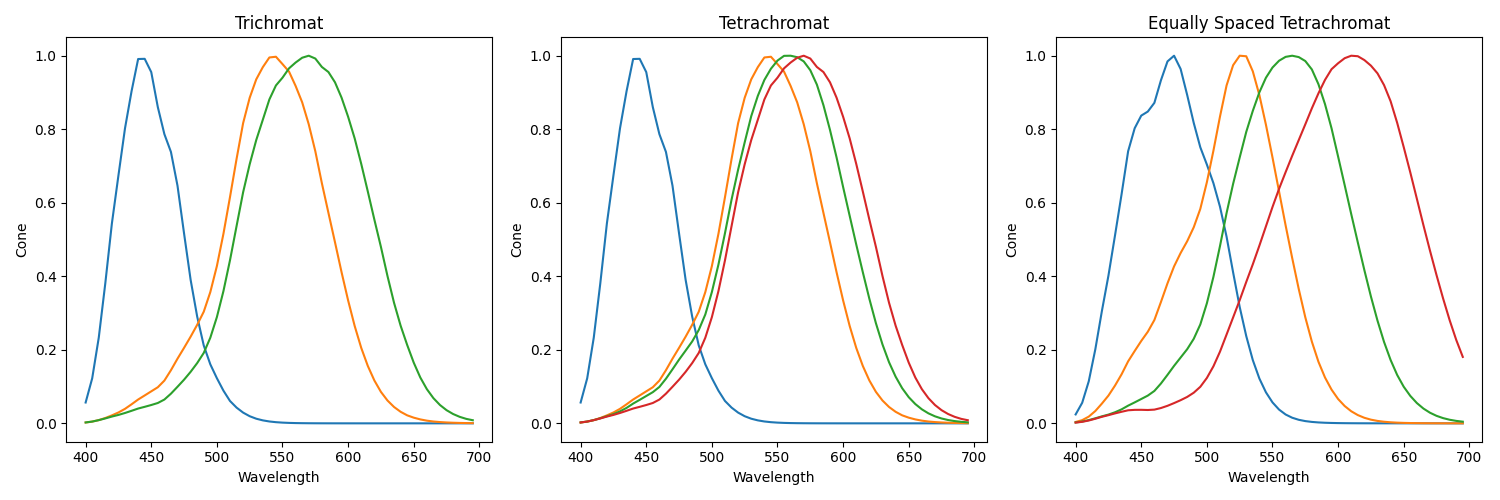

In [20]:
# Plot all the cone fundamentals next to each other so Ren can see the equally spaced one
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(trichromat.wavelengths, trichromat.sensor_matrix.T)
axs[0].set_title('Trichromat')

axs[1].plot(tetrachromat.wavelengths, tetrachromat.sensor_matrix.T)
axs[1].set_title('Tetrachromat')

axs[2].plot(equally_spaced_tetrachromat.wavelengths, equally_spaced_tetrachromat.sensor_matrix.T)
axs[2].set_title('Equally Spaced Tetrachromat')

for ax in axs:
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Sensitivity')

plt.tight_layout()
plt.show()

### Trichromat Cone Basis

Max Primaries -- (415, 520, 695)
Max Volume = 0.0837390518539801
(60, 2)
Volume Ratio Between n primaries / ideal = 0.9016369802652439


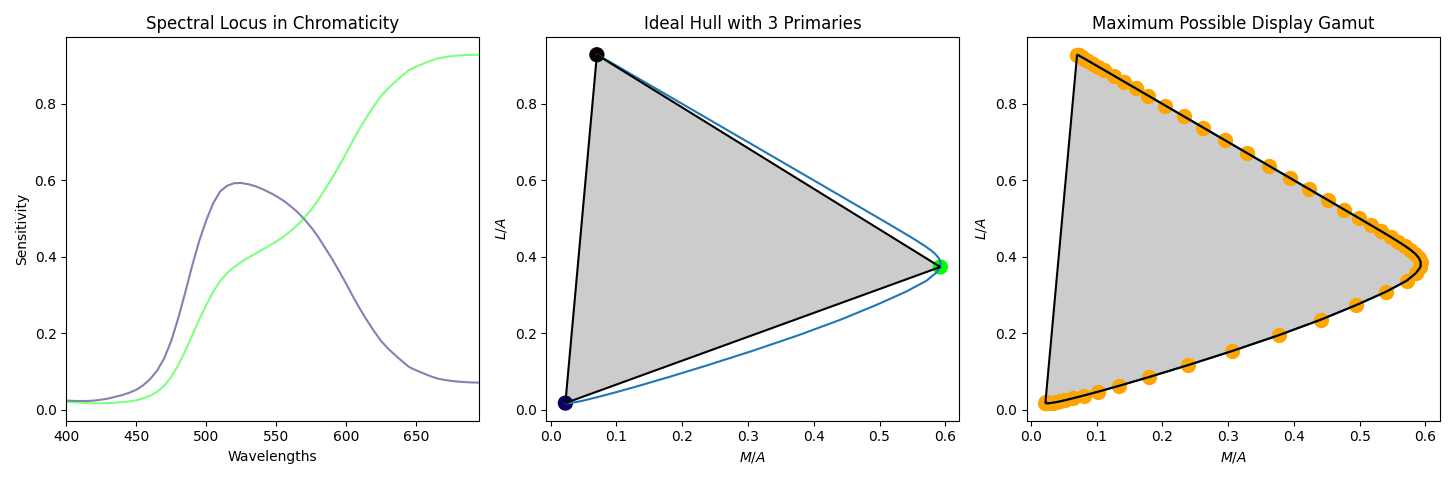

In [7]:
mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb.computeMaxPrimariesInChrom()
mdb.displayPrimariesInChromDiagram(title="Ideal Hull with 3 Primaries")

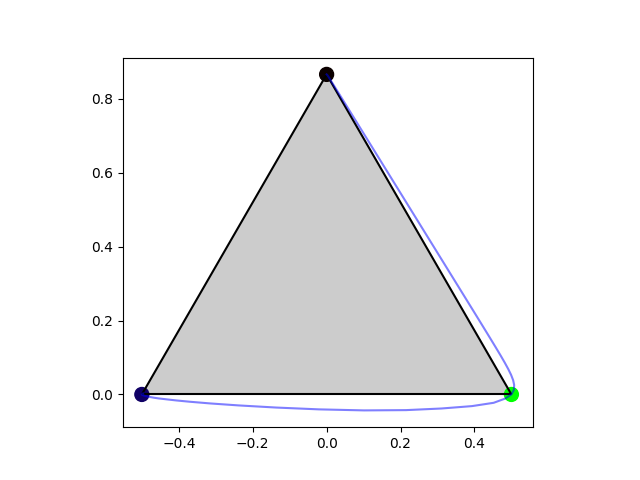

In [8]:
mdb.displayPrimariesInMaxSimplex()

### Trichromat Max Basis

Max Primaries -- (425, 515, 695)
Max Volume = 0.5226719664389339
(60, 2)
Volume Ratio Between n primaries / ideal = 0.7952343947416498


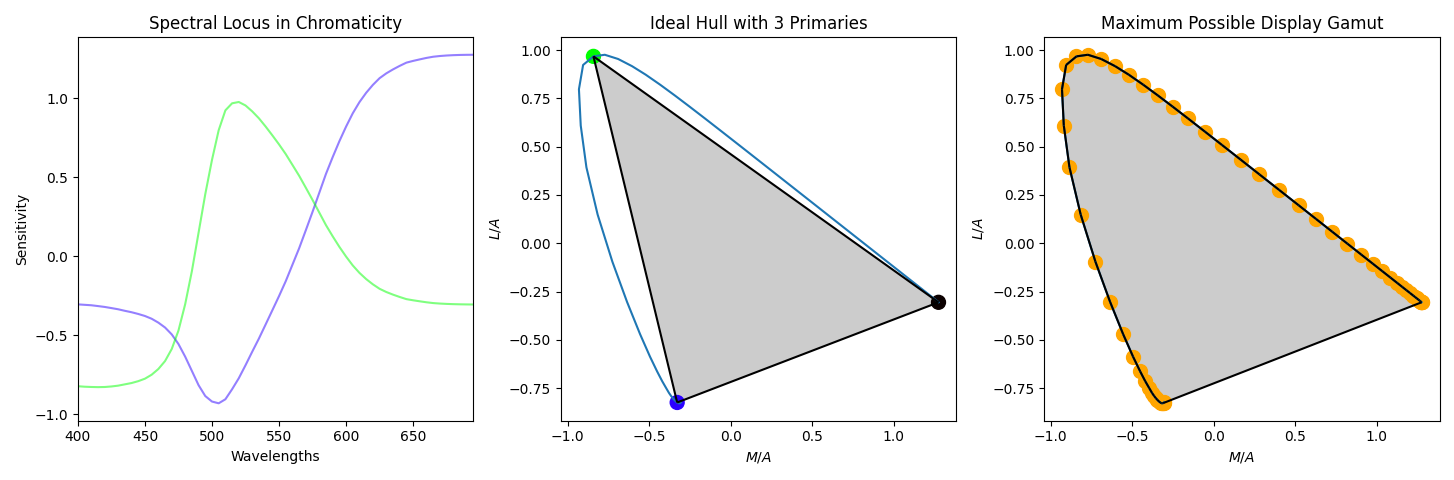

In [9]:
mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.HeringMaxBasisDisplay, transformMatrix=maxbasis_tri.get_cone_to_maxbasis_transform())
mdb.computeMaxPrimariesInChrom()
mdb.displayPrimariesInChromDiagram(title="Ideal Hull with 3 Primaries")

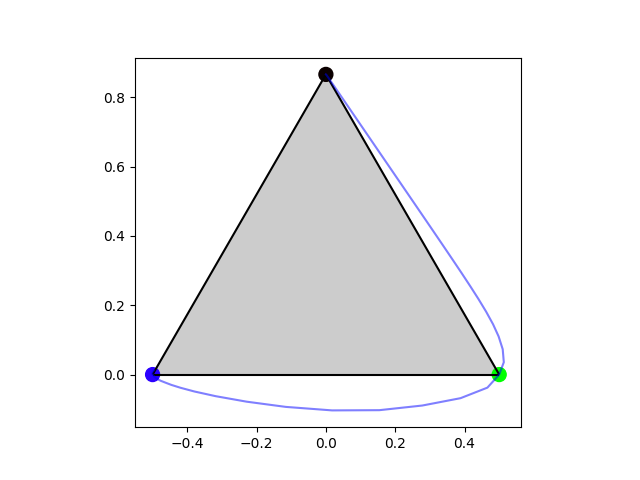

In [10]:
mdb.displayPrimariesInMaxSimplex()

### Tetrachromat Cone Basis

Max Primaries -- (415.0, 520.0, 610.0, 695.0)
Max Volume = 0.0011954535466257175
Volume Ratio Between n primaries / ideal = 0.6569824762477792


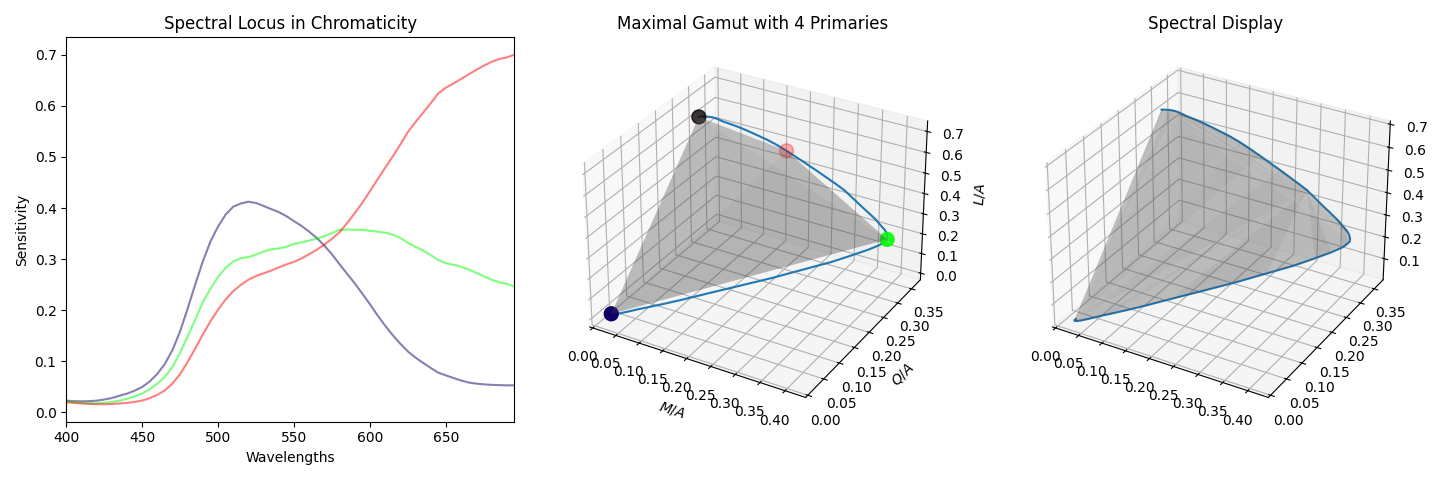

In [11]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

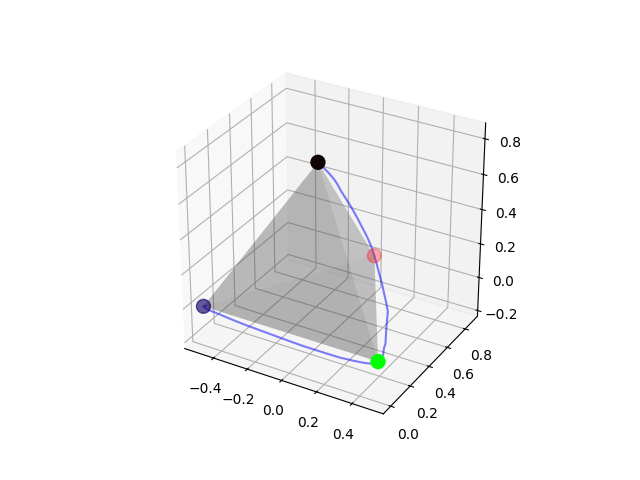

In [12]:
mdb1.displayPrimariesInMaxSimplex()

### Tetrachromat Max Basis

Max Primaries -- (455.0, 505.0, 580.0, 695.0)
Max Volume = 0.2267567416500227
Volume Ratio Between n primaries / ideal = 0.5141002876640804


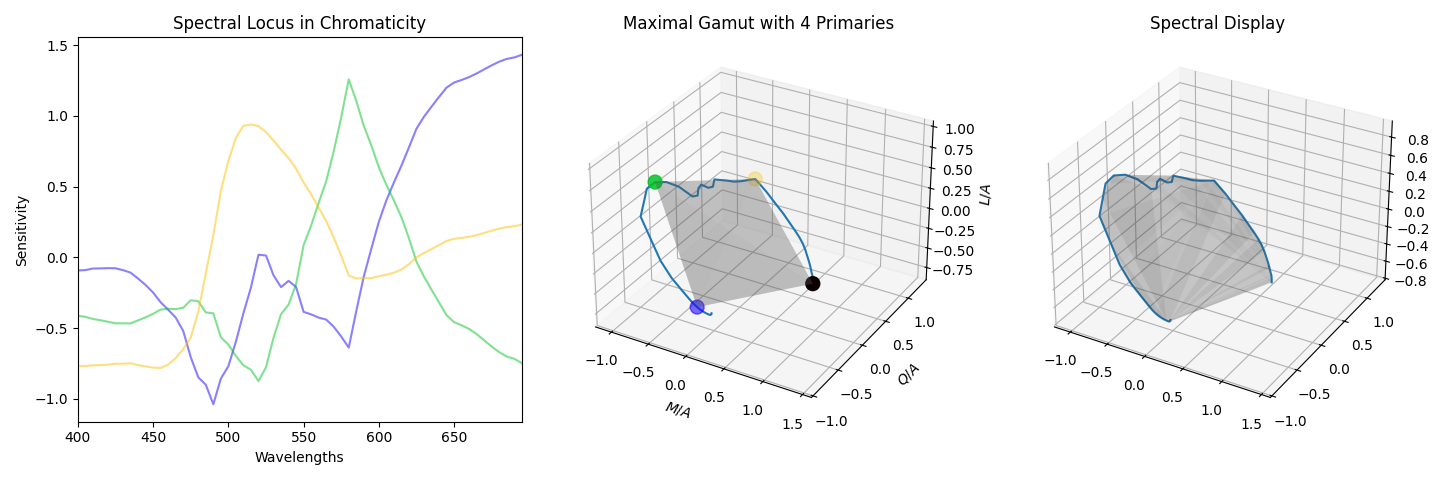

In [13]:
mdb1 = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.HeringMaxBasisDisplay, transformMatrix=maxbasis.get_cone_to_maxbasis_transform())
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

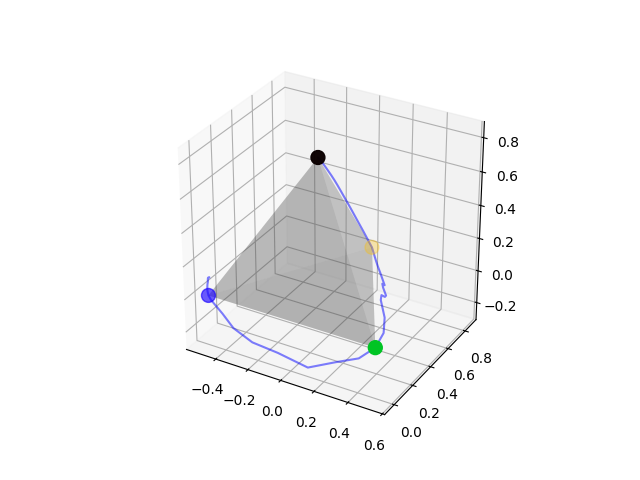

In [14]:
mdb1.displayPrimariesInMaxSimplex()

### Equally Spaced Tetrachromat Cone Basis

Max Primaries -- (415.0, 525.0, 590.0, 695.0)
Max Volume = 0.005513140245647301
Volume Ratio Between n primaries / ideal = 0.6035499443726443


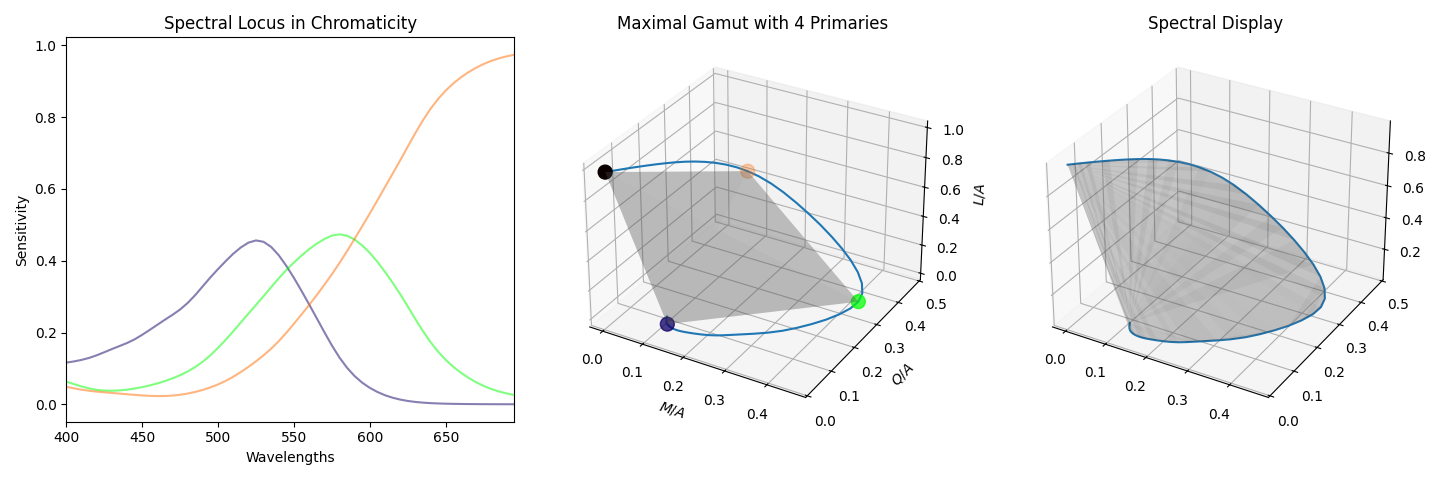

In [15]:
mdb1 = TetraDisplayGamut(equally_spaced_tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.ConeBasis)
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

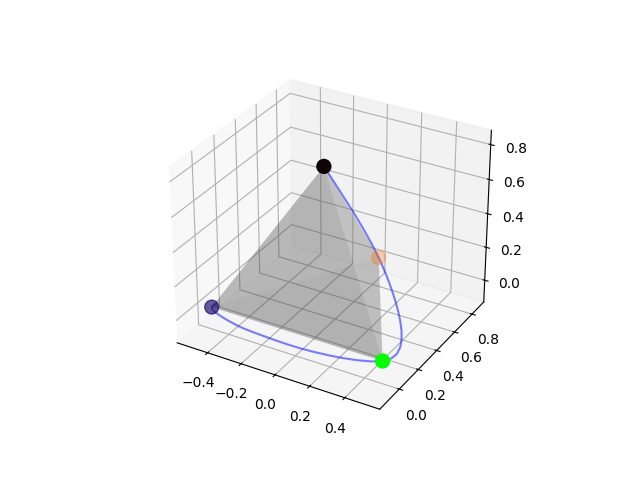

In [16]:
mdb1.displayPrimariesInMaxSimplex()

### Equally Spaced Tetrachromat Max Basis

Max Primaries -- (410.0, 525.0, 580.0, 695.0)
Max Volume = 0.19141298774655333
Volume Ratio Between n primaries / ideal = 0.5499149281668041


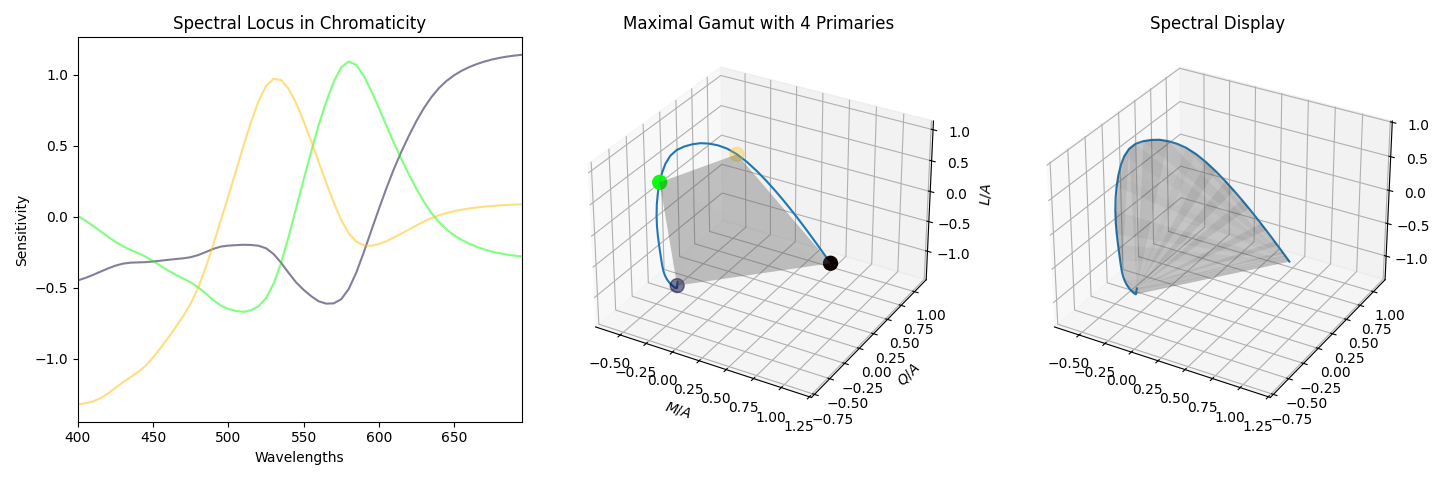

In [17]:
mdb1 = TetraDisplayGamut(equally_spaced_tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.HeringMaxBasisDisplay, transformMatrix=maxbasis_eq.get_cone_to_maxbasis_transform())
mdb1.computeMaxPrimariesInChrom()
mdb1.displayPrimariesInChromDiagram(title="Maximal Gamut with 4 Primaries")

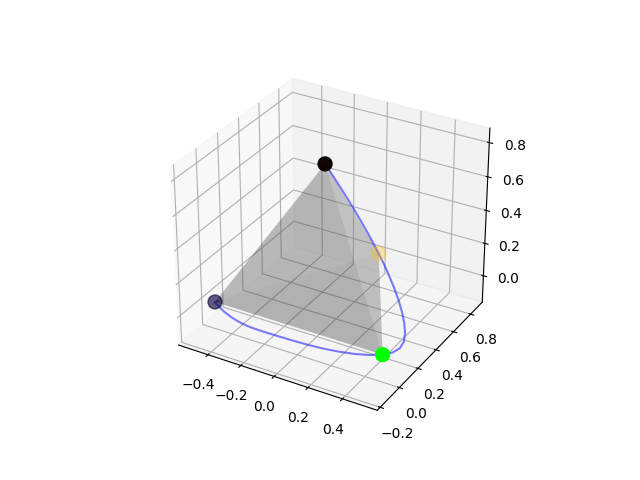

In [18]:
mdb1.displayPrimariesInMaxSimplex()